In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from scipy.cluster.hierarchy import dendrogram, cut_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from ISLP import load_data
from ISLP.cluster import compute_linkage

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
USArrests.mean(), USArrests.var(), USArrests.describe()

(Murder        7.788
 Assault     170.760
 UrbanPop     65.540
 Rape         21.232
 dtype: float64,
 Murder        18.970465
 Assault     6945.165714
 UrbanPop     209.518776
 Rape          87.729159
 dtype: float64,
          Murder     Assault   UrbanPop       Rape
 count  50.00000   50.000000  50.000000  50.000000
 mean    7.78800  170.760000  65.540000  21.232000
 std     4.35551   83.337661  14.474763   9.366385
 min     0.80000   45.000000  32.000000   7.300000
 25%     4.07500  109.000000  54.500000  15.075000
 50%     7.25000  159.000000  66.000000  20.100000
 75%    11.25000  249.000000  77.750000  26.175000
 max    17.40000  337.000000  91.000000  46.000000)

In [9]:
scaler = StandardScaler(with_mean=True, with_std=True)
US_scaled = scaler.fit_transform(USArrests)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [10]:
pcaUS = PCA().fit(US_scaled)

In [11]:
scores = pcaUS.transform(US_scaled)
scores

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

In [12]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [13]:
pcaUS.explained_variance_, pcaUS.explained_variance_ratio_

(array([2.53085875, 1.00996444, 0.36383998, 0.17696948]),
 array([0.62006039, 0.24744129, 0.0891408 , 0.04335752]))

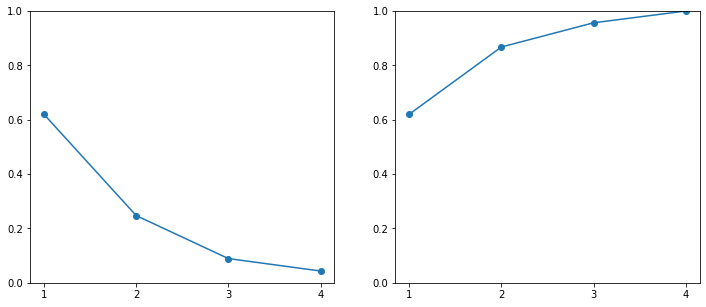

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ticks = np.arange(pcaUS.n_components_) + 1
ax0 = axs[0]
ax0.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax0.set_ylim([0, 1])
ax0.set_xticks(ticks)
ax1 = axs[1]
ax1.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')
ax1.set_ylim([0, 1])
ax1.set_xticks(ticks)

In [15]:
X = US_scaled.copy()
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [16]:
V, pcaUS.components_

(array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]),
 array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]))

In [17]:
(U * D[None, :])[:3], scores[:3]

(array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
        [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
        [-1.76316354, -0.74595678,  0.05478082, -0.83465292]]),
 array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
        [ 1.95013775,  1.07321326,  2.04000333, -0.43858344],
        [ 1.76316354, -0.74595678,  0.05478082, -0.83465292]]))

In [20]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [21]:
np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

In [22]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

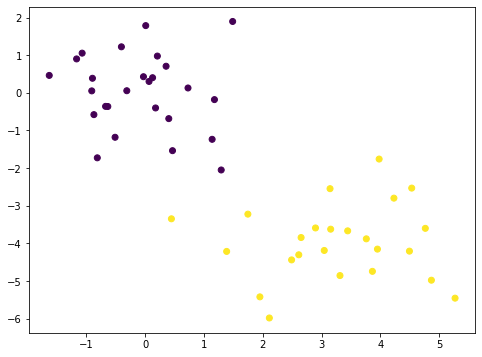

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [26]:
kmeans.inertia_

99.31537074091584

In [27]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [28]:
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average')
hc_avg.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [29]:
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single')
hc_sing.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [30]:
hc_ward = HClust(distance_threshold=0, n_clusters=None, linkage='ward')
hc_ward.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [39]:
cargs = {'color_threshold':4, 'above_threshold_color':'black'}

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [32.5, 32.5, 70.0, 70.0],
  [10.0, 10.0, 51.25, 51.25],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [102.5, 102.5, 141.25, 141.25],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [190.0, 190.0, 221.875, 221.875],
  [175.0, 175.0, 205.9375, 205.9375],
  [121.875, 121.875, 190.46875, 190.46875],
  [30.625, 30.625, 156.171875, 156.171875],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 32

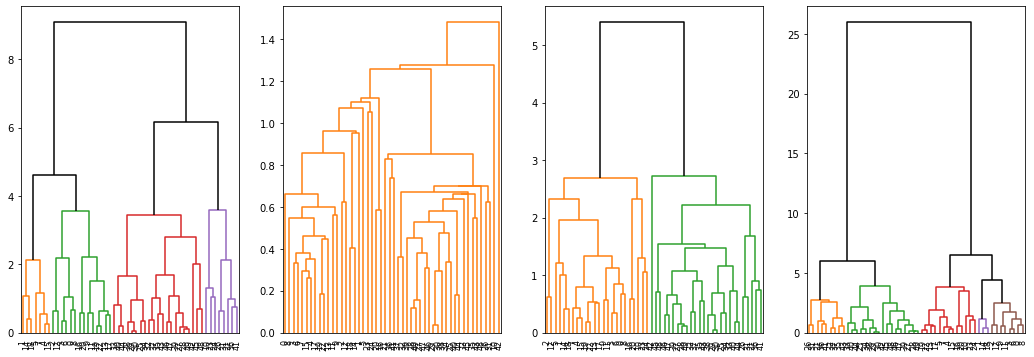

In [40]:
linkage_comp = compute_linkage(hc_comp)
linkage_sing = compute_linkage(hc_sing)
linkage_avg = compute_linkage(hc_avg)
linkage_ward = compute_linkage(hc_ward)
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
dendrogram(linkage_comp, ax=axs[0], **cargs)
dendrogram(linkage_sing, ax=axs[1], **cargs)
dendrogram(linkage_avg, ax=axs[2], **cargs)
dendrogram(linkage_ward, ax=axs[3], **cargs)

In [42]:
cut_tree(linkage_ward, height=10).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [28.125, 28.125, 101.875, 101.875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [170.0, 170.0, 203.75, 203.75],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [186.875, 186.875, 261.25, 261.25],
  [65.0, 65.0, 224.0625, 224.0625]],
 'dcoord': [[0.0, 6.6742917146367375e-06, 6.6742917146367375e-06, 0.0],
  [

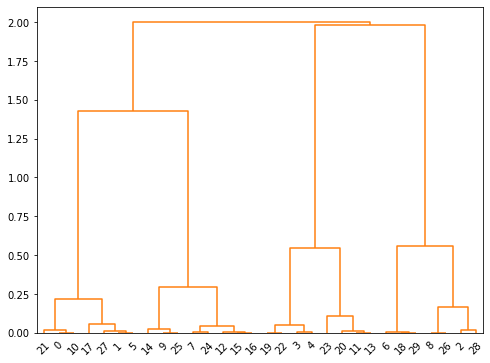

In [44]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
dendrogram(linkage_cor, ax=ax, **cargs)